In [2]:
import deepnets.data.load as loader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import deepnets.data.funcs as funcs
import json
colors = sns.color_palette("muted", 10)
import matplotlib.lines as mlines
E_GS = -0.4517531 #for L = 6

/Users/rajah.nutakki/repos/convnext_nnqs/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def get_results(base: str, nums: tuple):
    files = [base+f"{num}/" for num in nums]
    #print(files)
    logs = [loader.get_matching(file,"log")[0] for file in files]
    results = [json.load(open(log)) for log in logs]
    if len(files) == 1:
        files = files[0]
        results = results[0]
    #print(files)
    return results, files

## L = 6, vary depth and kernel_size

In [18]:
depths = [2,4,8,12]
kernels = [2, 3]
nruns = 3
L6results = np.zeros((len(depths),len(kernels),nruns),dtype='object') #(depth, kernel, runs)
files = np.zeros((len(depths),len(kernels),nruns),dtype='object') #(depth, kernel, runs)

#2x2 kernel
k_i = 0
# depth = 2
base = "files/L6/2x2/1/"
nums = [4]
L6results[0,k_i,0], files[0,k_i,0] = get_results(base,nums)
# depth = 4
nums = [1,5,9]
L6results[1,k_i,:], files[1,k_i,:] = get_results(base,nums)
# depth = 8
nums = [6,10]
L6results[2,k_i,:2],files[2,k_i,:2] = get_results(base,nums)
# depth = 12
nums = [7,11]
L6results[3,k_i,:2],files[3,k_i,:2] = get_results(base,nums)

# 3x3 kernel
k_i = 1
# depth = 2
base = "files/L6/3x3/1/"
nums = [0,3]
L6results[0,k_i,:2], files[0,k_i,:2] = get_results(base,nums)
# depth = 4
base = "files/L6/3x3/2/"
nums = [0]
L6results[1,k_i,0], files[1,k_i,0] = get_results(base,nums)
base = "files/L6/3x3/3/"
nums = [0,4]
L6results[1,k_i,1:],files[1,k_i,1:] = get_results(base,nums)
# depth = 8
base = "files/L6/3x3/1/"
nums = [1,4,7]
L6results[2,k_i,:],files[2,k_i,:] = get_results(base,nums)
# depth = 12
nums = [2,5,8]
L6results[3,k_i,:],files[3,k_i,:] = get_results(base,nums)

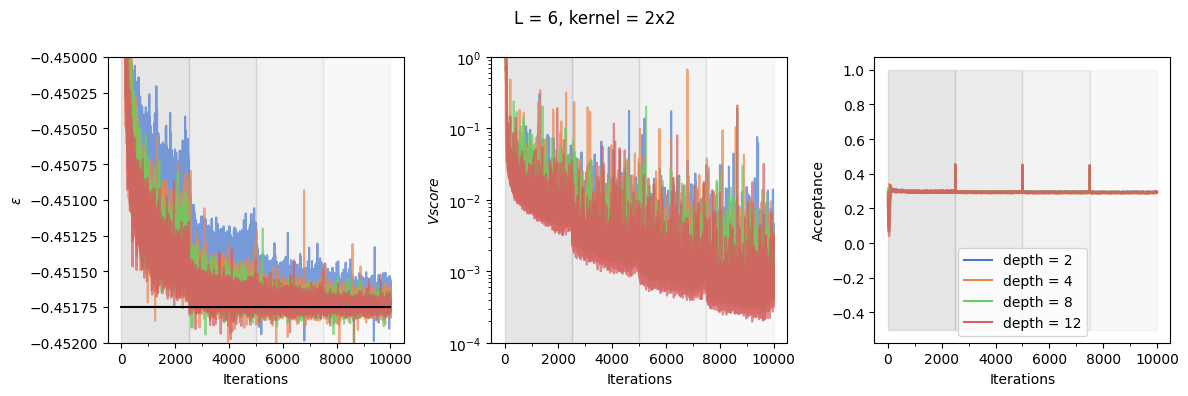

In [19]:
#2x2 kernels
k_i = 0
L = 6
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$\epsilon$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
for i in range(len(depths)):
    for j in range(nruns):
        res = L6results[i,k_i,j]
        if res != 0:
            axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[i],alpha = alpha)
            axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[i],alpha = alpha)
            axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[i],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.452,-0.45])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.449),ha='center')
    old_s = total_s
axes[0].plot([0,total_s],[E_GS,E_GS],'-k')
lines = [mlines.Line2D([],[],color=colors[i], label = f"depth = {depths[i]}") for i in range(len(depths))]
axes[2].legend(handles=lines)
fig.suptitle(f"L = {L}, kernel = {kernels[k_i]}x{kernels[k_i]}")
plt.show()

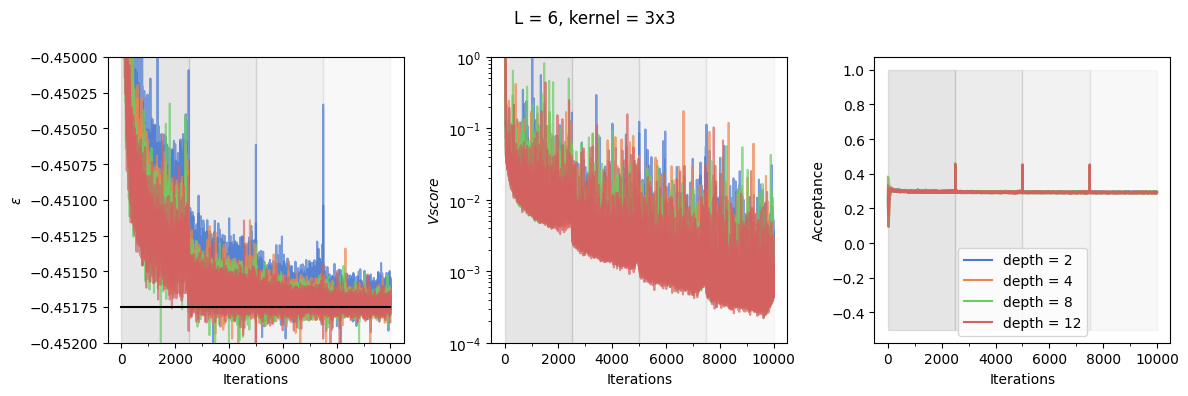

In [20]:
#3x3 kernels
k_i = 1
L = 6
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$\epsilon$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
for i in range(len(depths)):
    for j in range(nruns):
        res = L6results[i,k_i,j]
        if res != 0:
            axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[i],alpha = alpha)
            axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[i],alpha = alpha)
            axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[i],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.452,-0.45])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.449),ha='center')
    old_s = total_s
axes[0].plot([0,total_s],[E_GS,E_GS],'-k')
lines = [mlines.Line2D([],[],color=colors[i], label = f"depth = {depths[i]}") for i in range(len(depths))]
axes[2].legend(handles=lines)
fig.suptitle(f"L = {L}, kernel = {kernels[k_i]}x{kernels[k_i]}")
plt.show()

In [21]:
#Expectation values
energies = np.zeros((len(depths),len(kernels),nruns,2))
vscores = np.zeros((len(depths),len(kernels),nruns,2))
num_finished_simulations = np.zeros((len(depths),len(kernels)),dtype=int)
#Load the expectation values from the files
for i in range(len(depths)):
    for j in range(len(kernels)):
            for k in range(nruns):
                file = files[i,j,k]
                if type(file) == str:
                    try:
                        with open(file+"expectation_values.json","r") as f:
                            exp_load = json.load(f)
                            energies[i,j,k,0] = exp_load['energy']['mean']/(4*L**2)
                            energies[i,j,k,1] = exp_load['energy']['error_of_mean']/(4*L**2)
                            vscores[i,j,k,0] = L**2*exp_load['energy']['variance']/exp_load['energy']['mean']**2
                            vscores[i,j,k,1] = 0 #TODO proper error estimation
                            num_finished_simulations[i,j]+=1
                    except FileNotFoundError:
                        #print(f"File {file}expectation_values.json not found")
                        pass

#Take the values corresponding to the minimum over the runs
for j in range(len(kernels)):
    print(f"Kernel size = {kernels[j]}x{kernels[j]}")
    for i in range(len(depths)):
        print(f"Depth = {depths[i]}: {num_finished_simulations[i,j]}/{nruns} runs finished")
        print(f"Final energies = {energies[i,j,energies[i,j,:,0]!= 0,0]}")
        min_index = np.argmin(energies[i,j,:,0])
        print(f"Min energy = {energies[i,j,min_index,0]:.7f} +- {energies[i,j,min_index,1]:.7f}, std over runs = {np.std(energies[i,j,energies[i,j,:,0]!= 0,0]):.9f} (index = {min_index})")
        print(f"Corresponding Vscore = {vscores[i,j,min_index,0]:.7f} +- {vscores[i,j,min_index,1]:.7f}")
    # min_index = np.arange(len(exp_values[f"depth{depth}"]["energy"][0]))[np.array(exp_values[f"depth{depth}"]["energy"][0]) == min(exp_values[f"depth{depth}"]["energy"][0])][0] 
    # print("Minimum energy expectation values: ")
    # print(f"Energy = {exp_values[f'depth{depth}']['energy'][0][min_index]:.8f} +- {exp_values[f'depth{depth}']['energy'][1][min_index]:e}")
    # print(f"Vscore = {exp_values[f'depth{depth}']['vscore'][0][min_index]:.8f} +- {exp_values[f'depth{depth}']['vscore'][1][min_index]:e}")
    print("------------")

Kernel size = 2x2
Depth = 2: 1/3 runs finished
Final energies = [-0.45164276]
Min energy = -0.4516428 +- 0.0000048, std over runs = 0.000000000 (index = 0)
Corresponding Vscore = 0.0024053 +- 0.0000000
Depth = 4: 3/3 runs finished
Final energies = [-0.45171407 -0.45172393 -0.45171918]
Min energy = -0.4517239 +- 0.0000051, std over runs = 0.000004025 (index = 1)
Corresponding Vscore = 0.0009059 +- 0.0000000
Depth = 8: 2/3 runs finished
Final energies = [-0.45172752 -0.45172277]
Min energy = -0.4517275 +- 0.0000031, std over runs = 0.000002375 (index = 0)
Corresponding Vscore = 0.0007298 +- 0.0000000
Depth = 12: 2/3 runs finished
Final energies = [-0.45173236 -0.45173241]
Min energy = -0.4517324 +- 0.0000030, std over runs = 0.000000024 (index = 1)
Corresponding Vscore = 0.0006159 +- 0.0000000
------------
Kernel size = 3x3
Depth = 2: 2/3 runs finished
Final energies = [-0.45165676 -0.45165135]
Min energy = -0.4516568 +- 0.0000070, std over runs = 0.000002702 (index = 0)
Corresponding Vs

## L = 8, vary depth and kernel_size

In [8]:
depths = [2,4,8,12]
kernels = [2, 3, 4]
nruns = 3
results = np.zeros((len(depths),len(kernels),nruns),dtype='object') #(depth, kernel, runs)
files = np.zeros((len(depths),len(kernels),nruns),dtype='object') #(depth, kernel, runs)

#2x2 kernel
k_i = 0
# depth = 2
base = "files/L8/2x2/1/"
nums = [0,]
results[0,k_i,0], files[0,k_i,0] = get_results(base,nums)
# depth = 4
nums = [3,4,5]
results[1,k_i,:], files[1,k_i,:] = get_results(base,nums)
# depth = 8
nums = [6,7,8]
results[2,k_i,:],files[2,k_i,:] = get_results(base,nums)
# depth = 12
nums = [10,11]
results[3,k_i,:2],files[3,k_i,:2] = get_results(base,nums)

# 3x3 kernel
k_i = 1
# depth = 2
base = "files/L8/3x3/1/"
nums = [0,4,8]
results[0,k_i,:], files[0,k_i,:] = get_results(base,nums)
# depth = 4
nums = [1,5]
results[1,k_i,:2], files[1,k_i,:2] = get_results(base,nums)
base = "files/L8/3x3/2/"
nums = [0,]
results[1,k_i,2],files[1,k_i,2] = get_results(base,nums)
# depth = 8
base = "files/L8/3x3/1/"
nums = [2]
results[2,k_i,0],files[2,k_i,0] = get_results(base,nums)
base = "files/L8/3x3/3/"
nums = [1,4]
results[2,k_i,1:],files[2,k_i,1:] = get_results(base,nums)
# depth = 12
base = "files/L8/3x3/1/"
nums = [3,11]
results[3,k_i,:2],files[3,k_i,:2] = get_results(base,nums)

#4x4 kernel
k_i = 2
# depth = 2
base = "/Users/rajah.nutakki/cluster/projects/jeanzay/deepNQS/ConvNext/17_10_24/L=8/symm_ramp_4x4/"
nums = [0,4]
results[0,k_i,:2], files[0,k_i,:2] = get_results(base,nums)
#depth = 4
base = "/Users/rajah.nutakki/cluster/projects/jeanzay/deepNQS/ConvNext/17_10_24/L=8/symm_ramp_4x4/"
nums = [1,5]
results[1,k_i,:2], files[1,k_i,:2] = get_results(base,nums)
#depth = 8
base = "/Users/rajah.nutakki/cluster/projects/jeanzay/deepNQS/ConvNext/17_10_24/L=8/symm_ramp_4x4/"
nums = [2,]
results[2,k_i,0],files[2,k_i,0] = get_results(base,nums)
base = "/Users/rajah.nutakki/cluster/projects/jeanzay/deepNQS/ConvNext/20_11_24/L=8/symm_ramp_4x4/"
nums = [2,]
results[2,k_i,1],files[2,k_i,1] = get_results(base,nums)
# depth = 12
base = "/Users/rajah.nutakki/cluster/projects/jeanzay/deepNQS/ConvNext/17_10_24/L=8/symm_ramp_4x4/"
nums = [3,]
results[3,k_i,0],files[3,k_i,0] = get_results(base,nums)
base = "/Users/rajah.nutakki/cluster/projects/jeanzay/deepNQS/ConvNext/20_11_24/L=8/symm_ramp_4x4/"
nums = [4,]
results[3,k_i,1],files[3,k_i,1] = get_results(base,nums)

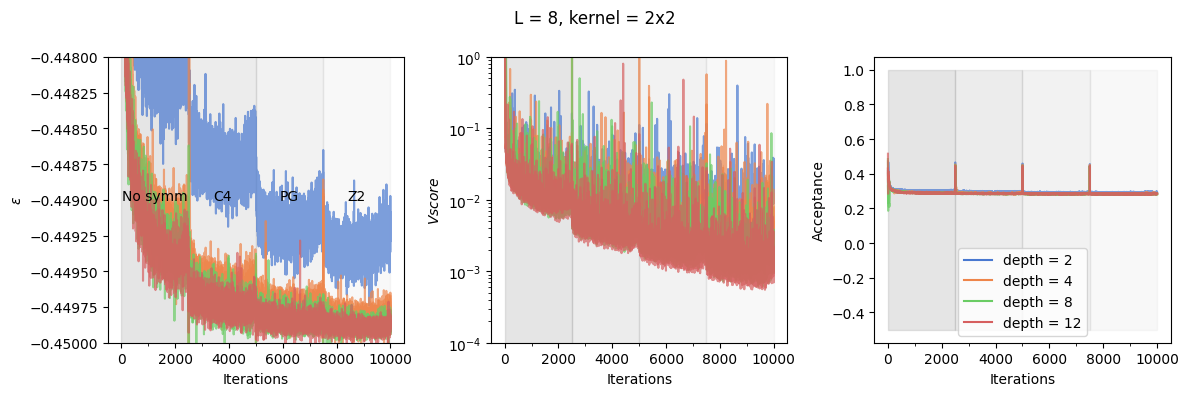

In [9]:
#2x2 kernels
k_i = 0
L = 8
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$\epsilon$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
for i in range(len(depths)):
    for j in range(nruns):
        res = results[i,k_i,j]
        if res != 0:
            axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[i],alpha = alpha)
            axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[i],alpha = alpha)
            axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[i],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.45,-0.448])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.449),ha='center')
    old_s = total_s
lines = [mlines.Line2D([],[],color=colors[i], label = f"depth = {depths[i]}") for i in range(len(depths))]
axes[2].legend(handles=lines)
fig.suptitle(f"L = {L}, kernel = {kernels[k_i]}x{kernels[k_i]}")
plt.show()

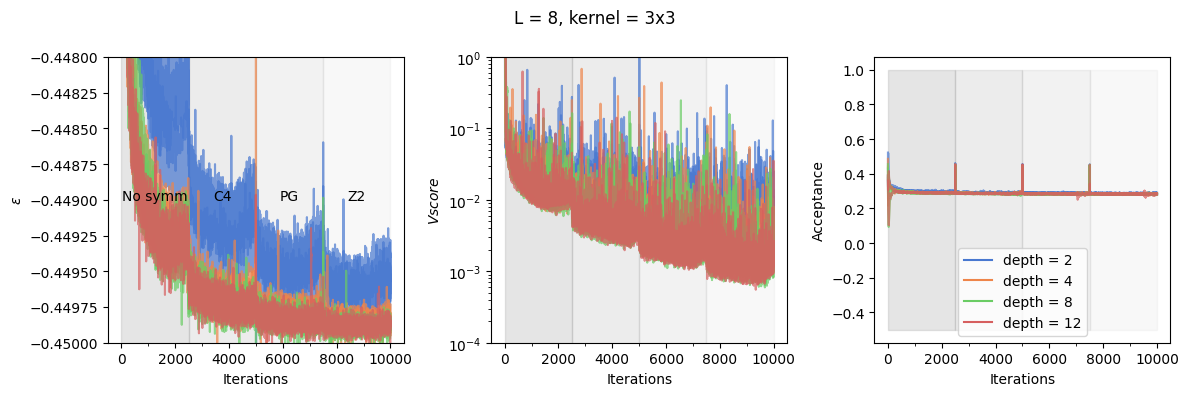

In [10]:
#3x3 kernels
k_i = 1
L = 8
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$\epsilon$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
for i in range(len(depths)):
    for j in range(nruns):
        res = results[i,k_i,j]
        if res != 0:
            axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[i],alpha = alpha)
            axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[i],alpha = alpha)
            axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[i],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.45,-0.448])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.449),ha='center')
    old_s = total_s
lines = [mlines.Line2D([],[],color=colors[i], label = f"depth = {depths[i]}") for i in range(len(depths))]
axes[2].legend(handles=lines)
fig.suptitle(f"L = {L}, kernel = {kernels[k_i]}x{kernels[k_i]}")
plt.show()

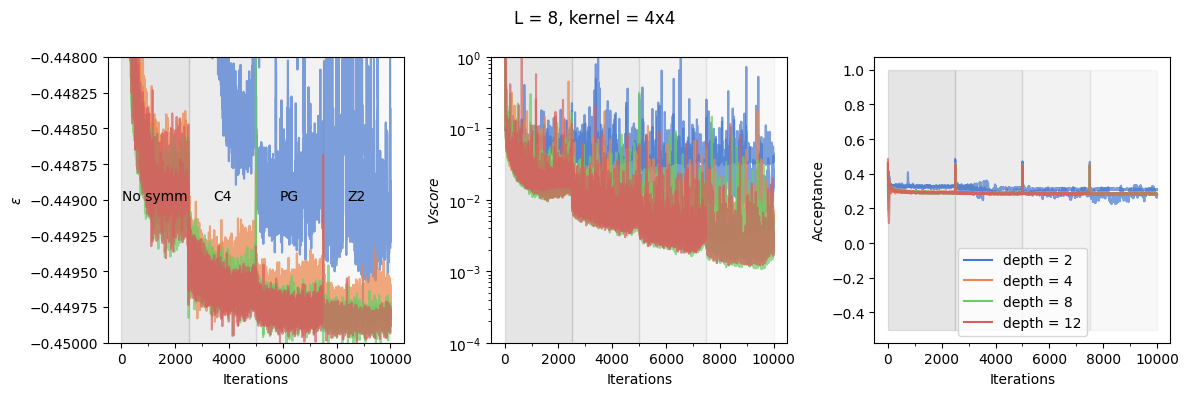

In [11]:
#4x4 kernels
k_i = 2
L = 8
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$\epsilon$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
for i in range(len(depths)):
    for j in range(nruns):
        res = results[i,k_i,j]
        if res != 0:
            axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[i],alpha = alpha)
            axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[i],alpha = alpha)
            axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[i],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.45,-0.448])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.449),ha='center')
    old_s = total_s
lines = [mlines.Line2D([],[],color=colors[i], label = f"depth = {depths[i]}") for i in range(len(depths))]
axes[2].legend(handles=lines)
fig.suptitle(f"L = {L}, kernel = {kernels[k_i]}x{kernels[k_i]}")
plt.show()

In [12]:
#Expectation values
energies = np.zeros((len(depths),len(kernels),nruns,2))
vscores = np.zeros((len(depths),len(kernels),nruns,2))
num_finished_simulations = np.zeros((len(depths),len(kernels)),dtype=int)
#Load the expectation values from the files
for i in range(len(depths)):
    for j in range(len(kernels)):
            for k in range(nruns):
                file = files[i,j,k]
                if type(file) == str:
                    try:
                        with open(file+"expectation_values.json","r") as f:
                            exp_load = json.load(f)
                            energies[i,j,k,0] = exp_load['energy']['mean']/(4*L**2)
                            energies[i,j,k,1] = exp_load['energy']['error_of_mean']/(4*L**2)
                            vscores[i,j,k,0] = L**2*exp_load['energy']['variance']/exp_load['energy']['mean']**2
                            vscores[i,j,k,1] = 0 #TODO proper error estimation
                            num_finished_simulations[i,j]+=1
                    except FileNotFoundError:
                        #print(f"File {file}expectation_values.json not found")
                        pass

#Take the values corresponding to the minimum over the runs
for j in range(len(kernels)):
    print(f"Kernel size = {kernels[j]}x{kernels[j]}")
    for i in range(len(depths)):
        print(f"Depth = {depths[i]}: {num_finished_simulations[i,j]}/{nruns} runs finished")
        print(f"Final energies = {energies[i,j,energies[i,j,:,0]!= 0,0]}")
        min_index = np.argmin(energies[i,j,:,0])
        print(f"Min energy = {energies[i,j,min_index,0]:.7f} +- {energies[i,j,min_index,1]:.7f}, std over runs = {np.std(energies[i,j,energies[i,j,:,0]!= 0,0]):.7f} (index = {min_index})")
        print(f"Corresponding Vscore = {vscores[i,j,min_index,0]:.7f} +- {vscores[i,j,min_index,1]:.9f}")
    # min_index = np.arange(len(exp_values[f"depth{depth}"]["energy"][0]))[np.array(exp_values[f"depth{depth}"]["energy"][0]) == min(exp_values[f"depth{depth}"]["energy"][0])][0] 
    # print("Minimum energy expectation values: ")
    # print(f"Energy = {exp_values[f'depth{depth}']['energy'][0][min_index]:.8f} +- {exp_values[f'depth{depth}']['energy'][1][min_index]:e}")
    # print(f"Vscore = {exp_values[f'depth{depth}']['vscore'][0][min_index]:.8f} +- {exp_values[f'depth{depth}']['vscore'][1][min_index]:e}")
    print("------------")

Kernel size = 2x2
Depth = 2: 1/3 runs finished
Final energies = [-0.44922538]
Min energy = -0.4492254 +- 0.0000109, std over runs = 0.0000000 (index = 0)
Corresponding Vscore = 0.0116005 +- 0.000000000
Depth = 4: 3/3 runs finished
Final energies = [-0.44980304 -0.44980009 -0.44980567]
Min energy = -0.4498057 +- 0.0000058, std over runs = 0.0000023 (index = 2)
Corresponding Vscore = 0.0030463 +- 0.000000000
Depth = 8: 3/3 runs finished
Final energies = [-0.44986882 -0.4498609  -0.44984838]
Min energy = -0.4498688 +- 0.0000035, std over runs = 0.0000084 (index = 0)
Corresponding Vscore = 0.0017295 +- 0.000000000
Depth = 12: 2/3 runs finished
Final energies = [-0.44987202 -0.44987565]
Min energy = -0.4498757 +- 0.0000035, std over runs = 0.0000018 (index = 1)
Corresponding Vscore = 0.0013080 +- 0.000000000
------------
Kernel size = 3x3
Depth = 2: 3/3 runs finished
Final energies = [-0.44952795 -0.44945059 -0.44959326]
Min energy = -0.4495933 +- 0.0000075, std over runs = 0.0000583 (index

## L = 10, vary depth and kernel_size

In [13]:
depths = [2,4,8,12]
kernels = [2, 3, 5]
nruns = 3
results = np.zeros((len(depths),len(kernels),nruns),dtype='object') #(depth, kernel, runs)
files = np.zeros((len(depths),len(kernels),nruns),dtype='object') #(depth, kernel, runs)
# 2x2 kernel
k_i = 0
# depth = 2
base = "files/L10/2x2/1/"
nums = [0]
results[0,k_i,0], files[0,k_i,0] = get_results(base,nums)
# depth = 4
nums = [3,5]
results[1,k_i,:2], files[1,k_i,:2] = get_results(base,nums)
# depth = 8
nums = [8]
results[2,k_i,0],files[2,k_i,0] = get_results(base,nums)
# depth = 12
nums = None #none finished

# 3x3 kernel
k_i = 1
# depth = 2
base = "files/L10/3x3/1/"
nums = [0,3,6]
results[0,k_i,:], files[0,k_i,:] = get_results(base,nums)
# depth = 4
base = "files/L10/3x3/2/"
nums = [1]
results[1,k_i,0], files[1,k_i,0] = get_results(base,nums)
base = "files/L10/3x3/3/"
nums = [2,6]
results[1,k_i,1:],files[1,k_i,1:] = get_results(base,nums)
# depth = 8
base = "files/L10/3x3/4/"
nums = [1,3,5]
results[2,k_i,:],files[2,k_i,:] = get_results(base,nums)
# depth = 12
base = "files/L10/3x3/5/"
nums = [0,1,2]
results[3,k_i,:],files[3,k_i,:] = get_results(base,nums)

# 5x5 kernel
k_i = 2
# depth = 2
base = "files/L10/5x5/1/"
nums = [9,13,17]
results[0,k_i,:], files[0,k_i,:] = get_results(base,nums)
# depth = 4
base = "files/L10/5x5/2/"
nums = [0,1]
results[1,k_i,:2], files[1,k_i,:2] = get_results(base,nums)
# depth = 8
base = "files/L10/5x5/3/"
nums = [0,1,2]
results[2,k_i,:],files[2,k_i,:] = get_results(base,nums)
# depth = 12
base = "files/L10/5x5/4/"
nums = [0,1,2]
results[3,k_i,:],files[3,k_i,:] = get_results(base,nums)


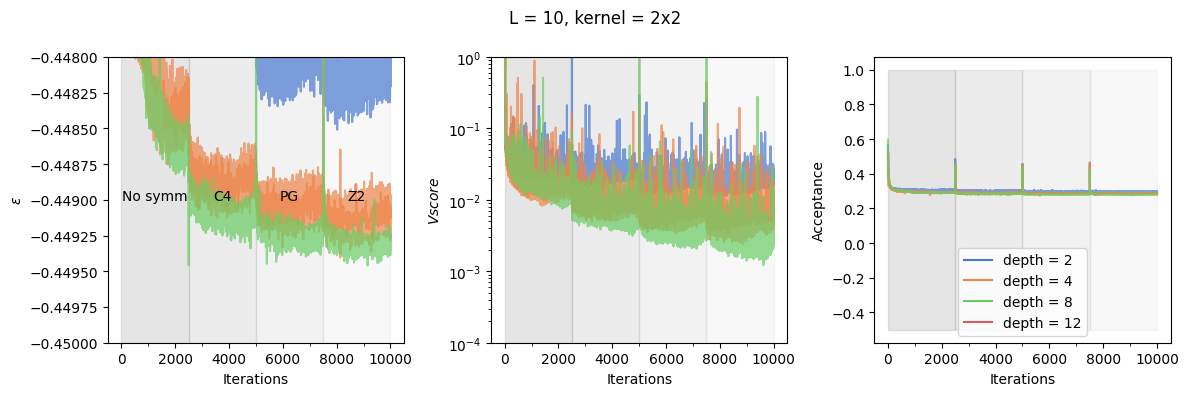

In [14]:
#2x2 kernels
k_i = 0
L = 10
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$\epsilon$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
count = 0
for i in range(len(depths)):
    for j in range(nruns):
        res = results[i,k_i,j]
        if res != 0:
            axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[i],alpha = alpha)
            axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[i],alpha = alpha)
            axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[i],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.45,-0.448])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.449),ha='center')
    old_s = total_s
lines = [mlines.Line2D([],[],color=colors[i], label = f"depth = {depths[i]}") for i in range(len(depths))]
axes[2].legend(handles=lines)
fig.suptitle(f"L = {L}, kernel = {kernels[k_i]}x{kernels[k_i]}")
plt.show()

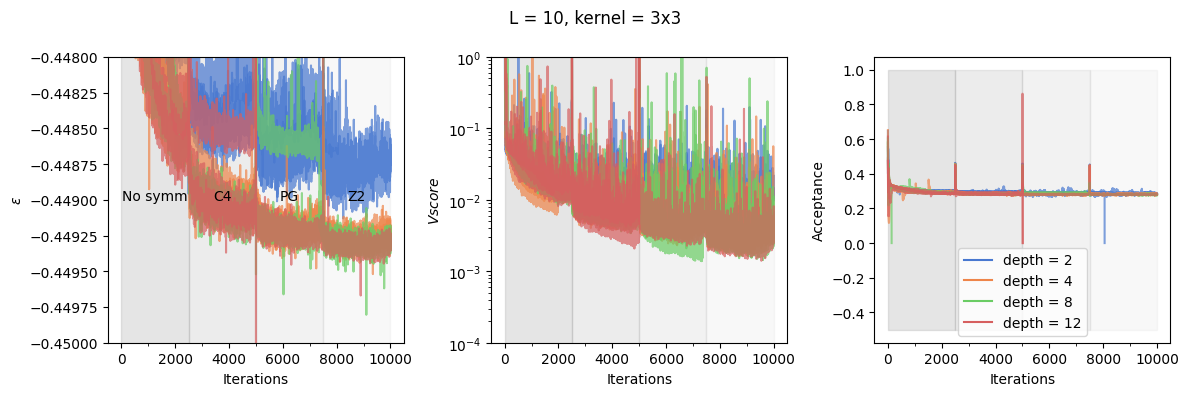

In [15]:
#3x3 kernels
k_i = 1
L = 10
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$\epsilon$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
count = 0
for i in range(len(depths)):
    for j in range(nruns):
        res = results[i,k_i,j]
        if res != 0:
            axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[i],alpha = alpha)
            axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[i],alpha = alpha)
            axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[i],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.45,-0.448])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.449),ha='center')
    old_s = total_s
lines = [mlines.Line2D([],[],color=colors[i], label = f"depth = {depths[i]}") for i in range(len(depths))]
axes[2].legend(handles=lines)
fig.suptitle(f"L = {L}, kernel = {kernels[k_i]}x{kernels[k_i]}")
plt.show()

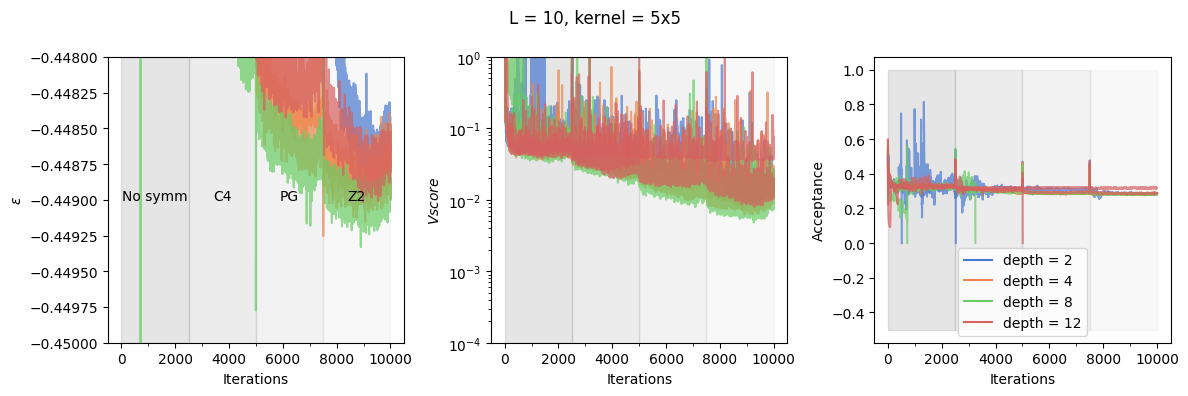

In [16]:
#5x5 kernels
k_i = 2
L = 10
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$\epsilon$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
count = 0
for i in range(len(depths)):
    for j in range(nruns):
        res = results[i,k_i,j]
        if res !=0:
            axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[i],alpha = alpha)
            axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[i],alpha = alpha)
            axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[i],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.45,-0.448])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.449),ha='center')
    old_s = total_s
lines = [mlines.Line2D([],[],color=colors[i], label = f"depth = {depths[i]}") for i in range(len(depths))]
axes[2].legend(handles=lines)
fig.suptitle(f"L = {L}, kernel = {kernels[k_i]}x{kernels[k_i]}")
plt.show()

In [17]:
#Expectation values
energies = np.zeros((len(depths),len(kernels),nruns,2))
vscores = np.zeros((len(depths),len(kernels),nruns,2))
num_finished_simulations = np.zeros((len(depths),len(kernels)),dtype=int)
#Load the expectation values from the files
for i in range(len(depths)):
    for j in range(len(kernels)):
            for k in range(nruns):
                file = files[i,j,k]
                if type(file) == str:
                    try:
                        with open(file+"expectation_values.json","r") as f:
                            exp_load = json.load(f)
                            energies[i,j,k,0] = exp_load['energy']['mean']/(4*L**2)
                            energies[i,j,k,1] = exp_load['energy']['error_of_mean']/(4*L**2)
                            vscores[i,j,k,0] = L**2*exp_load['energy']['variance']/exp_load['energy']['mean']**2
                            vscores[i,j,k,1] = 0 #TODO proper error estimation
                            num_finished_simulations[i,j]+=1
                    except FileNotFoundError:
                        #print(f"File {file}expectation_values.json not found")
                        pass

#Take the values corresponding to the minimum over the runs
for j in range(len(kernels)):
    print(f"Kernel size = {kernels[j]}x{kernels[j]}")
    for i in range(len(depths)):
        print(f"Depth = {depths[i]}: {num_finished_simulations[i,j]}/{nruns} runs finished")
        print(f"Final energies = {energies[i,j,energies[i,j,:,0]!= 0,0]}")
        min_index = np.argmin(energies[i,j,:,0])
        print(f"Min energy = {energies[i,j,min_index,0]:.7f} +- {energies[i,j,min_index,1]:.7f}, std over runs = {np.std(energies[i,j,energies[i,j,:,0]!= 0,0]):.7f} (index = {min_index})")
        print(f"Corresponding Vscore = {vscores[i,j,min_index,0]:.7f} +- {vscores[i,j,min_index,1]:.9f}")
    # min_index = np.arange(len(exp_values[f"depth{depth}"]["energy"][0]))[np.array(exp_values[f"depth{depth}"]["energy"][0]) == min(exp_values[f"depth{depth}"]["energy"][0])][0] 
    # print("Minimum energy expectation values: ")
    # print(f"Energy = {exp_values[f'depth{depth}']['energy'][0][min_index]:.8f} +- {exp_values[f'depth{depth}']['energy'][1][min_index]:e}")
    # print(f"Vscore = {exp_values[f'depth{depth}']['vscore'][0][min_index]:.8f} +- {exp_values[f'depth{depth}']['vscore'][1][min_index]:e}")
    print("------------")

Kernel size = 2x2
Depth = 2: 1/3 runs finished
Final energies = [-0.44808436]
Min energy = -0.4480844 +- 0.0000104, std over runs = 0.0000000 (index = 0)
Corresponding Vscore = 0.0179321 +- 0.000000000
Depth = 4: 2/3 runs finished
Final energies = [-0.44913189 -0.44905112]
Min energy = -0.4491319 +- 0.0000069, std over runs = 0.0000404 (index = 0)
Corresponding Vscore = 0.0061829 +- 0.000000000
Depth = 8: 1/3 runs finished
Final energies = [-0.44929288]
Min energy = -0.4492929 +- 0.0000036, std over runs = 0.0000000 (index = 0)
Corresponding Vscore = 0.0029957 +- 0.000000000
Depth = 12: 0/3 runs finished
Final energies = []
Min energy = 0.0000000 +- 0.0000000, std over runs = nan (index = 0)
Corresponding Vscore = 0.0000000 +- 0.000000000
------------
Kernel size = 3x3
Depth = 2: 2/3 runs finished
Final energies = [-0.44870528 -0.4487962 ]
Min energy = -0.4487962 +- 0.0000088, std over runs = 0.0000455 (index = 2)
Corresponding Vscore = 0.0113328 +- 0.000000000
Depth = 4: 3/3 runs fini

/Users/rajah.nutakki/repos/convnext_nnqs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rajah.nutakki/repos/convnext_nnqs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/rajah.nutakki/repos/convnext_nnqs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# No patching

In [23]:
L=6
base = "files/L6/nopatching/optimization/"
nums = (4,)
result_nopatching = get_results(base,nums)[0]
eps_patching = abs(-0.4517172 - E_GS)/abs(E_GS) #From L = 6, 3x3, depth 4
eps_nopatching = abs(-65.03517805364847/(4*L**2) - E_GS)/abs(E_GS)

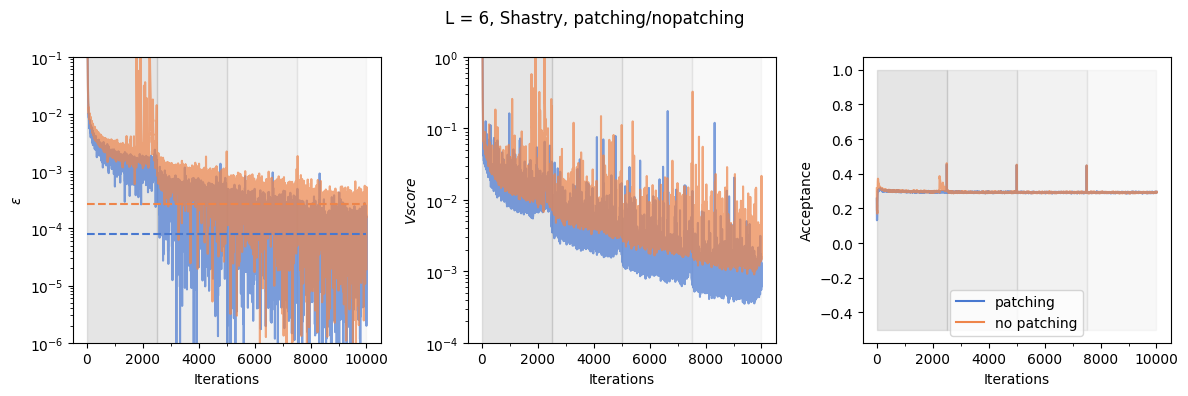

In [24]:
k_i = 1
min_index = 0
depth_i = 1
res1 = L6results[depth_i,k_i,min_index]
res2 = result_nopatching
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$\epsilon$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
for i, res in enumerate((res1,res2)):
    axes[0].plot(np.arange(len(res["Energy"]["iters"])),abs((funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2))-E_GS)/abs(E_GS),color=colors[i],alpha = alpha)
    axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[i],alpha = alpha)
    axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[i],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_yscale('log')
axes[0].set_ylim([1e-6,1e-1])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.449),ha='center')
    old_s = total_s
axes[0].plot([0,total_s],2*[eps_patching],'--',color=colors[0])
axes[0].plot([0,total_s],2*[eps_nopatching], '--',color=colors[1])
labels = ["patching","no patching"]
lines = [mlines.Line2D([],[],color=colors[i], label = labels[i]) for i in range(2)]
axes[2].legend(handles=lines)
fig.suptitle(f"L = {L}, Shastry, patching/nopatching")
#plt.savefig('patching.png',bbox_inches='tight',pad_inches=0.1,dpi=200)
plt.show()

# Expansion factor

In [40]:
results = np.zeros((4,3,3),dtype='object') # (depth, expansion factor, nruns)
files = np.zeros((4,3,3),dtype='object')
##
#depth = 2
d_i = 0
#expansion factor 1
base = "files/L10/ef1/1/"
nums=(0,2)
results[d_i,0,:2], files[d_i,0,:2] = get_results(base,nums)
#expansion factor 2
base = "files/L10/3x3/1/"
nums = [0,3,6]
results[d_i,1,:], files[d_i,1,:] = get_results(base,nums)
#expansion factor 4
base = "files/L10/ef4/1/"
nums=(4,)
results[d_i,2,0], files[d_i,2,0] = get_results(base,nums)
##
#depth = 4
d_i = 1
#expansion factor = 1
base = "files/L10/ef1/2/"
nums = (0,1,2)
results[d_i,0,:],files[d_i,0,:] = get_results(base,nums)
#expansion factor = 2
base = "files/L10/3x3/2/"
nums = [1]
results[1,d_i,0], files[1,d_i,0] = get_results(base,nums)
base = "files/L10/3x3/3/"
nums = [2,6]
results[1,d_i,1:],files[1,d_i,1:] = get_results(base,nums)
#expansion factor = 4
base = "files/L10/ef4/2/"
nums = (3,4,5)
results[d_i,2,:],files[d_i,2,:] = get_results(base,nums)
##
#depth = 6
d_i = 2
#expansion factor = 1
base = "files/L10/ef1/3/"
nums = (0,6)
results[d_i,0,:2],files[d_i,0,:2] = get_results(base,nums)
#expansion factor = 2
base = "files/L10/ef2/1/"
nums = (7,)
results[d_i,1,0], files[d_i,1,0] = get_results(base,nums)
#expansion factor = 3
base = "files/L10/ef3/1/"
nums = (5,)
results[d_i,2,0],files[d_i,2,0] = get_results(base,nums)
##
#depth = 8
d_i = 3
#expansion factor = 1
base = "files/L10/ef1/4/"
nums=(1,2)
results[d_i,0,:2], files[d_i,0,:2] = get_results(base,nums)
#expansion factor = 2
base = "files/L10/3x3/4/"
nums = [1,3,5]
results[2,d_i,:],files[2,d_i,:] = get_results(base,nums)
#expansion factor = 3
base = "files/L10/ef3/2/"
nums = (0,)
results[d_i,2,0],files[d_i,2,0] = get_results(base,nums)

IndexError: index 3 is out of bounds for axis 1 with size 3

Text(0.5, 0.98, 'L = 10,3x3 Expansion Factor')

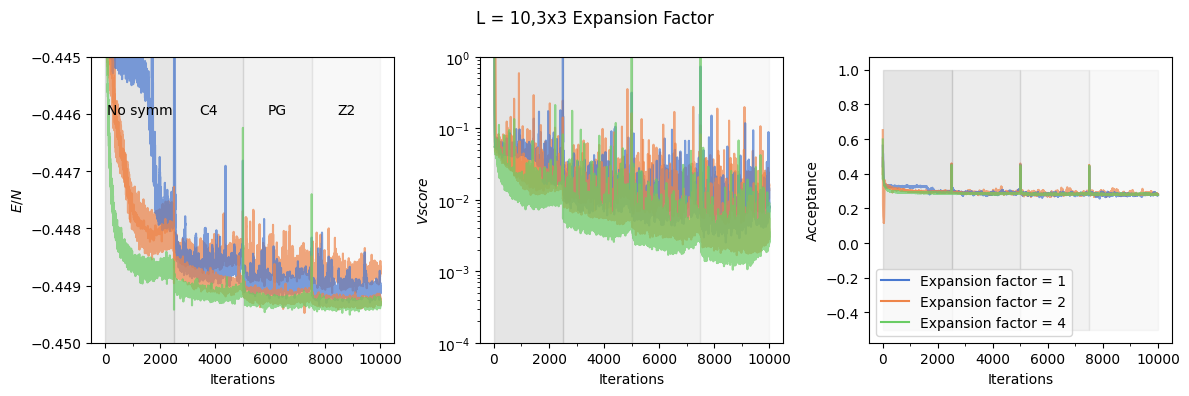

In [41]:
L = 10
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$E/N$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
for i, depth in enumerate((2,4,6,8)):
    for j, expansion_factor in enumerate((1,2,4)):
        for k in range(3):
            res = results[i,j,k]
        if res != 0:
            axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[j],alpha = alpha)
            axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[j],alpha = alpha)
            axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[j],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.45,-0.445])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.446),ha='center')
    old_s = total_s
labels = ["Expansion factor = 1","Expansion factor = 2","Expansion factor = 4"]
lines = [mlines.Line2D([],[],color=colors[i], label = labels[i]) for i in range(3)]
axes[2].legend(handles=lines)
# E_1 = -0.4490397
# E_2 = -0.4492539
# E_4 = -0.4493158
# axes[0].plot([0,total_s],2*[E_1],color=colors[0],linestyle='--')
# axes[0].plot([0,total_s],2*[E_4],color=colors[1],linestyle='--')
# axes[0].plot([0,total_s],2*[E_2],color=colors[2],linestyle='--')
fig.suptitle(f"L = {L},3x3 Expansion Factor")
#plt.savefig('expansion_factor.png',bbox_inches='tight',pad_inches=0.1,dpi=200)

In [42]:
#Expectation values
depths = (2,4,6,8)
expansion_factors = (1,2,4)
nruns = 3
energies = np.zeros((len(depths),len(expansion_factors),nruns,2)) #(depth, expansion_factor, nruns, ... )
vscores = np.zeros((len(depths),len(expansion_factors),nruns,2)) 
num_finished_simulations = np.zeros((len(depths),len(expansion_factors)),dtype=int)
#Load the expectation values from the files
for i in range(len(depths)):
    for j in range(len(expansion_factors)):
        for k in range(nruns):
            file = files[i,j,k]
            if file != 0:
                try:
                    with open(file+"expectation_values.json","r") as f:
                        exp_load = json.load(f)
                        energies[i,j,k,0] = exp_load['energy']['mean']/(4*L**2)
                        energies[i,j,k,1] = exp_load['energy']['error_of_mean']/(4*L**2)
                        vscores[i,j,k,0] = L**2*exp_load['energy']['variance']/exp_load['energy']['mean']**2
                        vscores[i,j,k,1] = 0 #TODO proper error estimation
                        num_finished_simulations[i,j]+=1
                except FileNotFoundError:
                    pass

#Take the values corresponding to the minimum over the runs
for i in range(len(depths)):
    print(f"Depth = {depths[i]}")
    if i == 2 or i == 3:
        expansion_factors = (1,2,3)
    else:
        expansion_factors = (1,2,4)
    for j in range(len(expansion_factors)):
        print(f"Expansion factor = {expansion_factors[j]}: {num_finished_simulations[i,j]}/{nruns} runs finished")
        print(f"Final energies = {energies[i,j,energies[i,j,:,0]!= 0,0]}")
        min_index = np.argmin(energies[i,j,:,0])
        print(f"Min energy = {energies[i,j,min_index,0]:.7f} +- {energies[i,j,min_index,1]:.7f}, std over runs = {np.std(energies[i,j,energies[i,j,:,0]!= 0,0]):.7f} (index = {min_index})")
        print(f"Corresponding Vscore = {vscores[i,j,min_index,0]:.7f} +- {vscores[i,j,min_index,1]:.9f}")
        # min_index = np.arange(len(exp_values[f"depth{depth}"]["energy"][0]))[np.array(exp_values[f"depth{depth}"]["energy"][0]) == min(exp_values[f"depth{depth}"]["energy"][0])][0] 
        # print("Minimum energy expectation values: ")
        # print(f"Energy = {exp_values[f'depth{depth}']['energy'][0][min_index]:.8f} +- {exp_values[f'depth{depth}']['energy'][1][min_index]:e}")
        # print(f"Vscore = {exp_values[f'depth{depth}']['vscore'][0][min_index]:.8f} +- {exp_values[f'depth{depth}']['vscore'][1][min_index]:e}")
        print("------------")

Depth = 2
Expansion factor = 1: 2/3 runs finished
Final energies = [-0.44812116 -0.44860399]
Min energy = -0.4486040 +- 0.0000098, std over runs = 0.0002414 (index = 1)
Corresponding Vscore = 0.0155650 +- 0.000000000
------------
Expansion factor = 2: 2/3 runs finished
Final energies = [-0.44870528 -0.4487962 ]
Min energy = -0.4487962 +- 0.0000088, std over runs = 0.0000455 (index = 2)
Corresponding Vscore = 0.0113328 +- 0.000000000
------------
Expansion factor = 4: 1/3 runs finished
Final energies = [-0.44892538]
Min energy = -0.4489254 +- 0.0000094, std over runs = 0.0000000 (index = 0)
Corresponding Vscore = 0.0108448 +- 0.000000000
------------
Depth = 4
Expansion factor = 1: 1/3 runs finished
Final energies = [-0.44903967]
Min energy = -0.4490397 +- 0.0000071, std over runs = 0.0000000 (index = 2)
Corresponding Vscore = 0.0092682 +- 0.000000000
------------
Expansion factor = 2: 3/3 runs finished
Final energies = [-0.4492372  -0.44925015 -0.44925386]
Min energy = -0.4492539 +- 0.

/Users/rajah.nutakki/repos/convnext_nnqs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rajah.nutakki/repos/convnext_nnqs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/rajah.nutakki/repos/convnext_nnqs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Output head

In [46]:
results = np.zeros((2,4,3),dtype='object') # (output depth, output expansion factor, nruns)
files = np.zeros((2,4,3),dtype='object')
##
#output depth = 1
d_i = 0
#expansion factor 1/2
base = "files/L10/output/depth1/1/"
nums=(2,4)
results[d_i,0,:2], files[d_i,0,:2] = get_results(base,nums)
#expansion factor 1
base = "files/L10/3x3/2/"
nums = [1]
results[d_i,1,0], files[d_i,1,0] = get_results(base,nums)
base = "files/L10/3x3/3/"
nums = [2,6]
results[d_i,1,1:],files[d_i,1,1:] = get_results(base,nums)
#expansion factor 2
base = "files/L10/output/depth1/1/"
nums = (1,5)
results[d_i,2,:2], files[d_i,2,:2] = get_results(base,nums)
##
#output depth  = 2
d_i = 1
#expansion factor = 1/2
base = "files/L10/output/depth2/1/"
nums = (0,3)
results[d_i,0,:2],files[d_i,0,:2] = get_results(base,nums)
#expansion factor = 1
nums = (4,)
results[d_i,1,0], files[d_i,1,0] = get_results(base,nums)
#expansion factor = 2
nums = (2,5,8)
results[d_i,2,:], files[d_i,2,:] = get_results(base,nums)
#expansion factor = 3
base = "files/L10/output/depth2/2/"
nums = (0,1,2)
results[d_i,3,:],files[d_i,3,:] = get_results(base,nums)

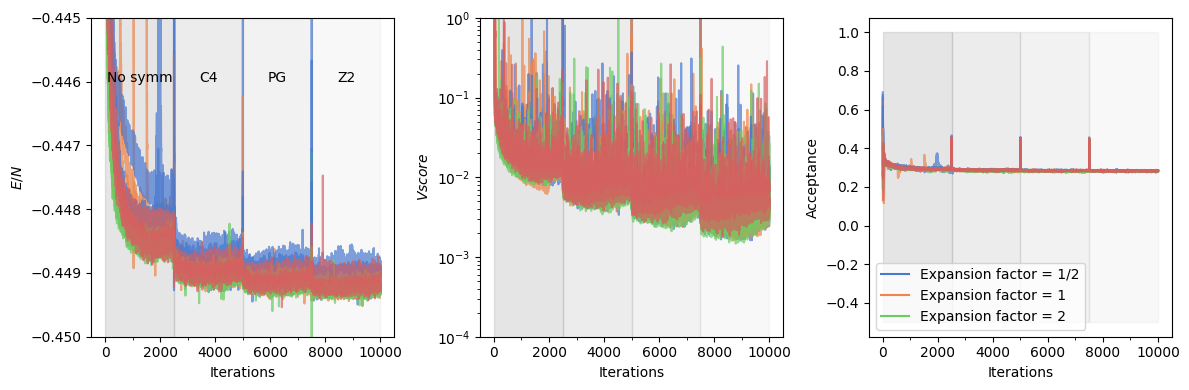

In [47]:
L = 10
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$E/N$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        for k in range(results.shape[2]):
            res = results[i,j,k]
            if res != 0:
                axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[j],alpha = alpha)
                axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[j],alpha = alpha)
                axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[j],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.45,-0.445])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.446),ha='center')
    old_s = total_s
labels = ["Expansion factor = 1/2","Expansion factor = 1","Expansion factor = 2"]
lines = [mlines.Line2D([],[],color=colors[i], label = labels[i]) for i in range(3)]
axes[2].legend(handles=lines)
# E_1 = -0.4490397
# E_2 = -0.4492539
# E_4 = -0.4493158
# axes[0].plot([0,total_s],2*[E_1],color=colors[0],linestyle='--')
# axes[0].plot([0,total_s],2*[E_4],color=colors[1],linestyle='--')
# axes[0].plot([0,total_s],2*[E_2],color=colors[2],linestyle='--')
#fig.suptitle(f"L = {L},3x3 Expansion Factor")
#plt.savefig('expansion_factor.png',bbox_inches='tight',pad_inches=0.1,dpi=200)

In [48]:
#Expectation values
output_depths = (1,2)
expansion_factors = (1/2,1,2,3)
nruns = 3
energies = np.zeros((len(output_depths),len(expansion_factors),nruns,2)) #(depth, expansion_factor, nruns, ... )
vscores = np.zeros((len(output_depths),len(expansion_factors),nruns,2)) 
num_finished_simulations = np.zeros((len(output_depths),len(expansion_factors)),dtype=int)
#Load the expectation values from the files
for i in range(len(output_depths)):
    for j in range(len(expansion_factors)):
        for k in range(nruns):
            file = files[i,j,k]
            if file != 0:
                try:
                    with open(file+"expectation_values.json","r") as f:
                        exp_load = json.load(f)
                        energies[i,j,k,0] = exp_load['energy']['mean']/(4*L**2)
                        energies[i,j,k,1] = exp_load['energy']['error_of_mean']/(4*L**2)
                        vscores[i,j,k,0] = L**2*exp_load['energy']['variance']/exp_load['energy']['mean']**2
                        vscores[i,j,k,1] = 0 #TODO proper error estimation
                        num_finished_simulations[i,j]+=1
                except FileNotFoundError:
                    pass

#Take the values corresponding to the minimum over the runs
for i in range(len(output_depths)):
    print(f"Output Depth = {output_depths[i]}")
    for j in range(len(expansion_factors)):
        print(f"Output Expansion factor = {expansion_factors[j]}: {num_finished_simulations[i,j]}/{nruns} runs finished")
        num_completed = int(num_finished_simulations[i,j])
        print(f"Final energies = {energies[i,j,energies[i,j,:,0]!= 0,0]}")
        min_index = np.argmin(energies[i,j,:,0])
        print(f"Min energy = {energies[i,j,min_index,0]:.7f} +- {energies[i,j,min_index,1]:.7f}, std over runs = {np.std(energies[i,j,energies[i,j,:,0]!= 0,0]):.7f} (index = {min_index})")
        energy = (float(energies[i,j,min_index,0]), float(energies[i,j,min_index,1]))
        std_over_runs = float(np.std(energies[i,j,energies[i,j,:,0]!= 0,0]))
        print(f"Corresponding Vscore = {vscores[i,j,min_index,0]:.7f} +- {vscores[i,j,min_index,1]:.9f}")
        vscore = (float(vscores[i,j,min_index,0]),float(vscores[i,j,min_index,1]))
        # min_index = np.arange(len(exp_values[f"depth{depth}"]["energy"][0]))[np.array(exp_values[f"depth{depth}"]["energy"][0]) == min(exp_values[f"depth{depth}"]["energy"][0])][0] 
        # print("Minimum energy expectation values: ")
        # print(f"Energy = {exp_values[f'depth{depth}']['energy'][0][min_index]:.8f} +- {exp_values[f'depth{depth}']['energy'][1][min_index]:e}")
        # print(f"Vscore = {exp_values[f'depth{depth}']['vscore'][0][min_index]:.8f} +- {exp_values[f'depth{depth}']['vscore'][1][min_index]:e}")
        print("------------")

Output Depth = 1
Output Expansion factor = 0.5: 2/3 runs finished
Final energies = [-0.44925031 -0.44919358]
Min energy = -0.4492503 +- 0.0000044, std over runs = 0.0000284 (index = 0)
Corresponding Vscore = 0.0033224 +- 0.000000000
------------
Output Expansion factor = 1: 3/3 runs finished
Final energies = [-0.4492372  -0.44925015 -0.44925386]
Min energy = -0.4492539 +- 0.0000051, std over runs = 0.0000071 (index = 2)
Corresponding Vscore = 0.0037906 +- 0.000000000
------------
Output Expansion factor = 2: 2/3 runs finished
Final energies = [-0.44921456 -0.4492317 ]
Min energy = -0.4492317 +- 0.0000059, std over runs = 0.0000086 (index = 1)
Corresponding Vscore = 0.0053664 +- 0.000000000
------------
Output Expansion factor = 3: 0/3 runs finished
Final energies = []
Min energy = 0.0000000 +- 0.0000000, std over runs = nan (index = 0)
Corresponding Vscore = 0.0000000 +- 0.000000000
------------
Output Depth = 2
Output Expansion factor = 0.5: 2/3 runs finished
Final energies = [-0.4488

/Users/rajah.nutakki/repos/convnext_nnqs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rajah.nutakki/repos/convnext_nnqs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/rajah.nutakki/repos/convnext_nnqs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [5]:
#q != 0 head
#output depth = 1, output expansion factor = 1
base = "files/L10/output/q_head/"
nums=(2,)
results,files = get_results(base,nums)

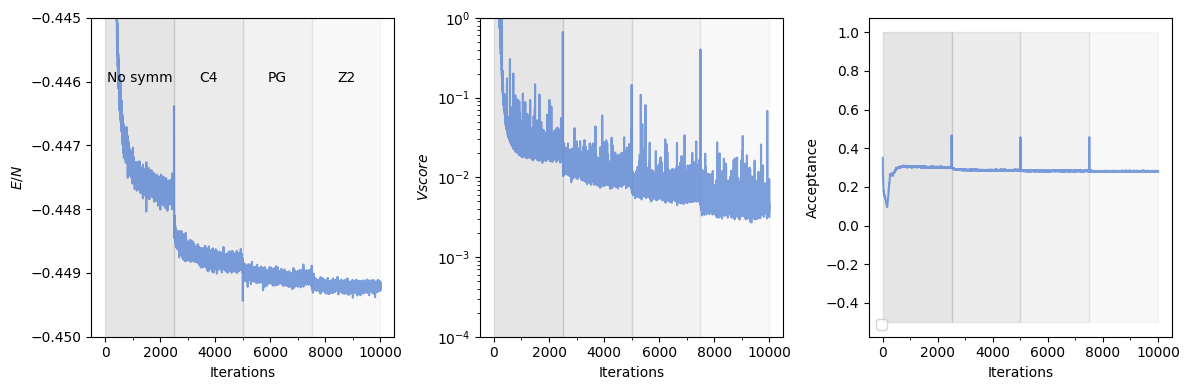

In [12]:
L = 10
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$E/N$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
res = results
axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[0],alpha = alpha)
axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[0],alpha = alpha)
axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[0],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.45,-0.445])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.446),ha='center')
    old_s = total_s
axes[2].legend(handles=lines)

In [11]:
file = files
try:
    with open(file+"expectation_values.json","r") as f:
        exp_load = json.load(f)
        print(f"E = {exp_load['energy']['mean']/(4*L**2):.7f} +- {exp_load['energy']['error_of_mean']/(4*L**2):.9f}")
        print(f"Vscore = {L**2*exp_load['energy']['variance']/exp_load['energy']['mean']**2:.7f} +- 0")
except FileNotFoundError:
    pass

E = -0.4492133 +- 0.000005391
Vscore = 0.0044833 +- 0


# Final benchmarks

## Shastry

In [13]:
L = 10
base = "files/L10/benchmarks/shastry/"
nums = (1,2)
results, files = get_results(base,nums)

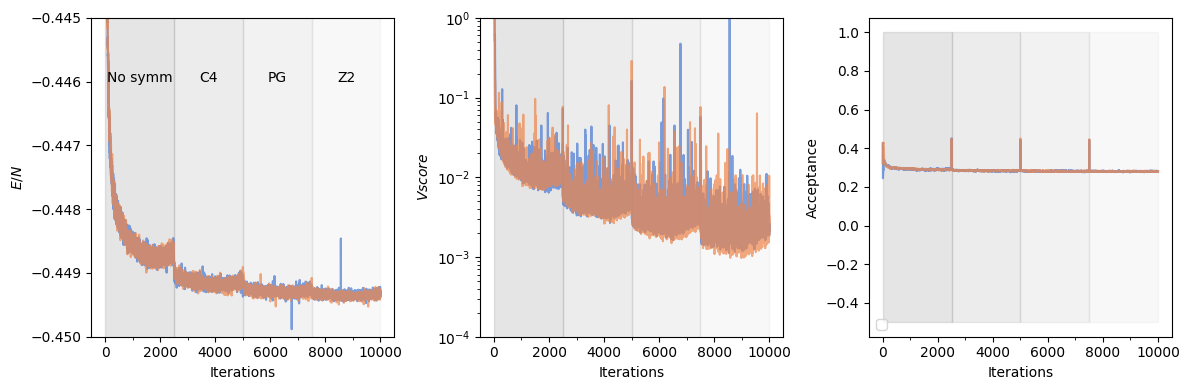

In [16]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$E/N$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4 = 2.5e3, 2.5e3, 2.5e3, 2.5e3
symms = ['No symm', 'C4', 'PG', 'Z2']
for i,res in enumerate(results):
    axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[i],alpha = alpha)
    axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[i],alpha = alpha)
    axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[i],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)

axes[0].set_ylim([-0.45,-0.445])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.446),ha='center')
    old_s = total_s
axes[2].legend(handles=lines)

In [20]:
energies = []
vscores = []
for file in files:
    with open(file+"expectation_values.json","r") as f:
        exp_load = json.load(f)
        e_temp = (exp_load['energy']['mean']/(4*L**2), exp_load['energy']['error_of_mean']/(4*L**2))
        v_temp = (L**2*exp_load['energy']['variance']/exp_load['energy']['mean']**2,0)
        energies.append(e_temp)
        vscores.append(v_temp)

print(energies)
print(vscores)

[(-0.4493301161928099, 4.387877263250616e-06), (-0.4493421121268112, 3.904227967820761e-06)]
[(0.0025934533709084644, 0), (0.002183638896948244, 0)]


## J1-J2

In [21]:
L = 10
base = "files/L10/benchmarks/j1j2/"
nums = (1,2)
results, files = get_results(base,nums)

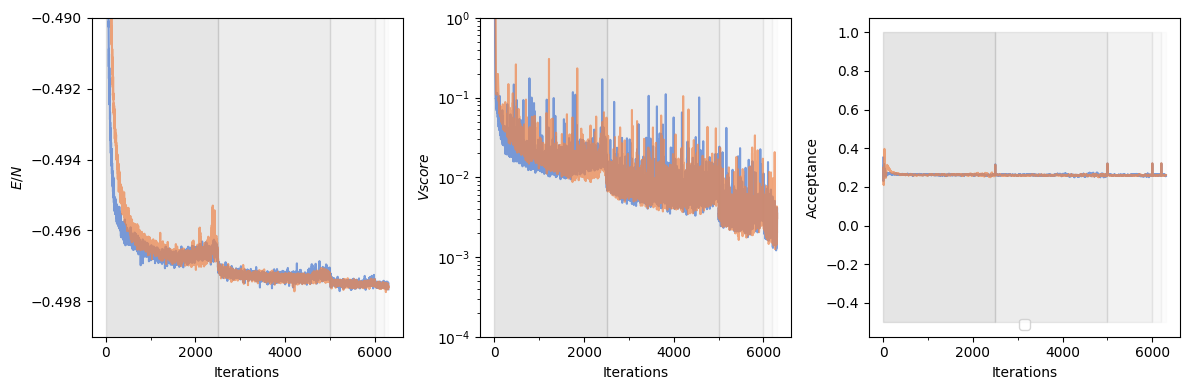

In [26]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
ylabels = [r'$E/N$',r'$Vscore$','Acceptance']
alpha = 0.7
lines=[]
xticks = np.arange(0,1.1e4,2e3)
xticks_m = np.arange(1e3,1e4,2e3)
s1,s2,s3,s4,s5 = 2.5e3, 2.5e3, 1e3, 200,100
symms = ['None','Trans', 'C4', 'PG', 'Z2']
for i,res in enumerate(results):
    axes[0].plot(np.arange(len(res["Energy"]["iters"])),funcs.to_array(res["Energy"]["Mean"]["real"])/(4*L**2),color=colors[i],alpha = alpha)
    axes[1].semilogy(np.arange(len(res["Energy"]["iters"])),funcs.vscore(funcs.to_array(res["Energy"]["Mean"]["real"]),funcs.to_array(res["Energy"]["Variance"]),L**2),color=colors[i],alpha = alpha)
    axes[2].plot(np.arange(len(res["acceptance"]["iters"])),res["acceptance"]["value"],color=colors[i],alpha = alpha)

for i,ax in enumerate(axes):
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(xticks,minor=False)
    ax.set_xticks(xticks_m,minor=True)
    ax.fill_between([0,s1],-0.5, 1, color='gray', alpha=0.2)
    ax.fill_between([s1,s1+s2],-0.5,1, color = 'gray', alpha = 0.15)
    ax.fill_between([s1+s2,s1+s2+s3],-0.5,1, color = 'gray', alpha = 0.1)
    ax.fill_between([s1+s2+s3,s1+s2+s3+s4],-0.5,1, color = 'gray', alpha = 0.05)
    ax.fill_between([s1+s2+s3+s4,s1+s2+s3+s4+s5],-0.5,1, color = 'gray', alpha = 0.02)

axes[0].set_ylim([-0.499,-0.490])
axes[1].set_ylim([1e-4,1])
total_s = 0
old_s = 0
for i,s in enumerate((s1,s2,s3,s4,s5)):
    total_s += s
    axes[0].annotate(symms[i],xy=((total_s+old_s)/2,-0.446),ha='center')
    old_s = total_s
axes[2].legend(handles=lines)

In [27]:
energies = []
vscores = []
for file in files:
    with open(file+"expectation_values.json","r") as f:
        exp_load = json.load(f)
        e_temp = (exp_load['energy']['mean']/(4*L**2), exp_load['energy']['error_of_mean']/(4*L**2))
        v_temp = (L**2*exp_load['energy']['variance']/exp_load['energy']['mean']**2,0)
        energies.append(e_temp)
        vscores.append(v_temp)

print(energies)
print(vscores)

[(-0.4975738741900859, 6.184492558446531e-06), (-0.4975827288198424, 5.751903088141703e-06)]
[(0.002582772372368559, 0), (0.002727916908247034, 0)]
